### Clean and EDA on ESG data provided by NINFTY50


In [1]:
import pandas as pd
import numpy as sns
import matplotlib.pyplot as plt
import seaborn as sns

ESG_df = pd.read_csv(r'C:\Users\harsh\OneDrive\Desktop\data analysis\AI powered supply chain esg and risk optimizatoin\data\ESG_data_ NIFTY50_export_final.csv')
ESG_df.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ADANIENT,Adani Enterprises Ltd.,Adani Corporate House\nShantigram Near Vaishno...,Energy,Metals & Mining,NaN,"Adani Enterprises Limited, together with its s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,Adani Corporate House\nShantigram Near Vaishno...,Industrials,Services,"3,129","Adani Ports and Special Economic Zone Limited,...",12.6,3.6,5.6,3.4,High Controversy Level,4.0,6th percentile,Low
2,APOLLOHOSP,Apollo Hospitals Enterprise Ltd.,Sunny Side Building\n3rd Floor East Block No. ...,Healthcare,Healthcare,"83,147","Apollo Hospitals Enterprise Limited, together ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ASIANPAINT,Asian Paints Ltd.,"Asian Paints House\n6A, Shantinagar Santacruz ...",Basic Materials,Consumer Durables,NaN,"Asian Paints Limited, together with its subsid...",25.4,11.3,6.2,8.0,Low Controversy Level,1.0,51st percentile,Medium
4,AXISBANK,Axis Bank Ltd.,"Axis House\nC-2, Wadia International Centre Pa...",Financial Services,Financial Services,NaN,Axis Bank Limited provides various financial p...,24.2,2.3,11.6,10.3,Significant Controversy Level,3.0,45th percentile,Medium


In [2]:
ESG_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  50 non-null     object 
 1   Name                    50 non-null     object 
 2   Address                 50 non-null     object 
 3   Sector                  50 non-null     object 
 4   Industry                50 non-null     object 
 5   Full Time Employees     14 non-null     object 
 6   Description             50 non-null     object 
 7   Total ESG Risk score    38 non-null     float64
 8   Environment Risk Score  38 non-null     float64
 9   Governance Risk Score   38 non-null     float64
 10  Social Risk Score       38 non-null     float64
 11  Controversy Level       38 non-null     object 
 12  Controversy Score       38 non-null     float64
 13  ESG Risk Percentile     38 non-null     object 
 14  ESG Risk Level          38 non-null     obje

In [3]:
ESG_df.columns.tolist()

['Symbol',
 'Name',
 'Address',
 'Sector',
 'Industry',
 'Full Time Employees',
 'Description',
 'Total ESG Risk score',
 'Environment Risk Score',
 'Governance Risk Score',
 'Social Risk Score',
 'Controversy Level',
 'Controversy Score',
 'ESG Risk Percentile',
 'ESG Risk Level']

In [ ]:
# Drop duplicate company entry
ESG_df['Name'].drop_duplicates()

0                         Adani Enterprises Ltd.
1     Adani Ports and Special Economic Zone Ltd.
2               Apollo Hospitals Enterprise Ltd.
3                              Asian Paints Ltd.
4                                 Axis Bank Ltd.
5                                Bajaj Auto Ltd.
6                             Bajaj Finance Ltd.
7                             Bajaj Finserv Ltd.
8              Bharat Petroleum Corporation Ltd.
9                             Bharti Airtel Ltd.
10                     Britannia Industries Ltd.
11                                    Cipla Ltd.
12                               Coal India Ltd.
13                      Divi's Laboratories Ltd.
14                 Dr. Reddy's Laboratories Ltd.
15                            Eicher Motors Ltd.
16                        Grasim Industries Ltd.
17                         HCL Technologies Ltd.
18                                HDFC Bank Ltd.
19              HDFC Life Insurance Company Ltd.
20                  

In [5]:
# Handling missing values
ESG_df.isnull().sum()

Symbol                     0
Name                       0
Address                    0
Sector                     0
Industry                   0
Full Time Employees       36
Description                0
Total ESG Risk score      12
Environment Risk Score    12
Governance Risk Score     12
Social Risk Score         12
Controversy Level         12
Controversy Score         12
ESG Risk Percentile       12
ESG Risk Level            12
dtype: int64

In [19]:
numeric_col = [ col for col in ESG_df.columns if ESG_df[col].dtype == 'float64']

for col in numeric_col:
    ESG_df[col] = ESG_df.groupby('Sector')[col].transform(lambda x:x.fillna(x.median()))



C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\harsh\AppData\Roaming\Pyth

In [11]:
# Handling missing categorical columns
cat_cols = ['ESG Risk Level','Controversy Level']
for col in cat_cols:
    ESG_df[col] = ESG_df[col].fillna("Unknown")

    

In [12]:
ESG_df['Full Time Employees'] = pd.to_numeric(ESG_df['Full Time Employees'],errors='coerce')
ESG_df['Full Time Employees'] = ESG_df.groupby('Sector')['Full Time Employees'].transform(lambda x:x.fillna(x.median()))


C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\harsh\AppData\Roaming\Pyth

In [13]:
# Drop Unneccessary columns
ESG_df = ESG_df.drop(columns=['Address','Description'],errors='ignore')


In [20]:
print(ESG_df.isna().sum())

Symbol                     0
Name                       0
Sector                     0
Industry                   0
Full Time Employees       50
Total ESG Risk score       0
Environment Risk Score     0
Governance Risk Score      0
Social Risk Score          0
Controversy Level          0
Controversy Score          0
ESG Risk Percentile       12
ESG Risk Level             0
dtype: int64


### EDA on ESG dataset


In [21]:
print(ESG_df.info())
print(ESG_df.describe())
print(ESG_df['Sector'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  50 non-null     object 
 1   Name                    50 non-null     object 
 2   Sector                  50 non-null     object 
 3   Industry                50 non-null     object 
 4   Full Time Employees     0 non-null      float64
 5   Total ESG Risk score    50 non-null     float64
 6   Environment Risk Score  50 non-null     float64
 7   Governance Risk Score   50 non-null     float64
 8   Social Risk Score       50 non-null     float64
 9   Controversy Level       50 non-null     object 
 10  Controversy Score       50 non-null     float64
 11  ESG Risk Percentile     38 non-null     object 
 12  ESG Risk Level          50 non-null     object 
dtypes: float64(6), object(7)
memory usage: 5.2+ KB
None
       Full Time Employees  Total ESG Risk sc

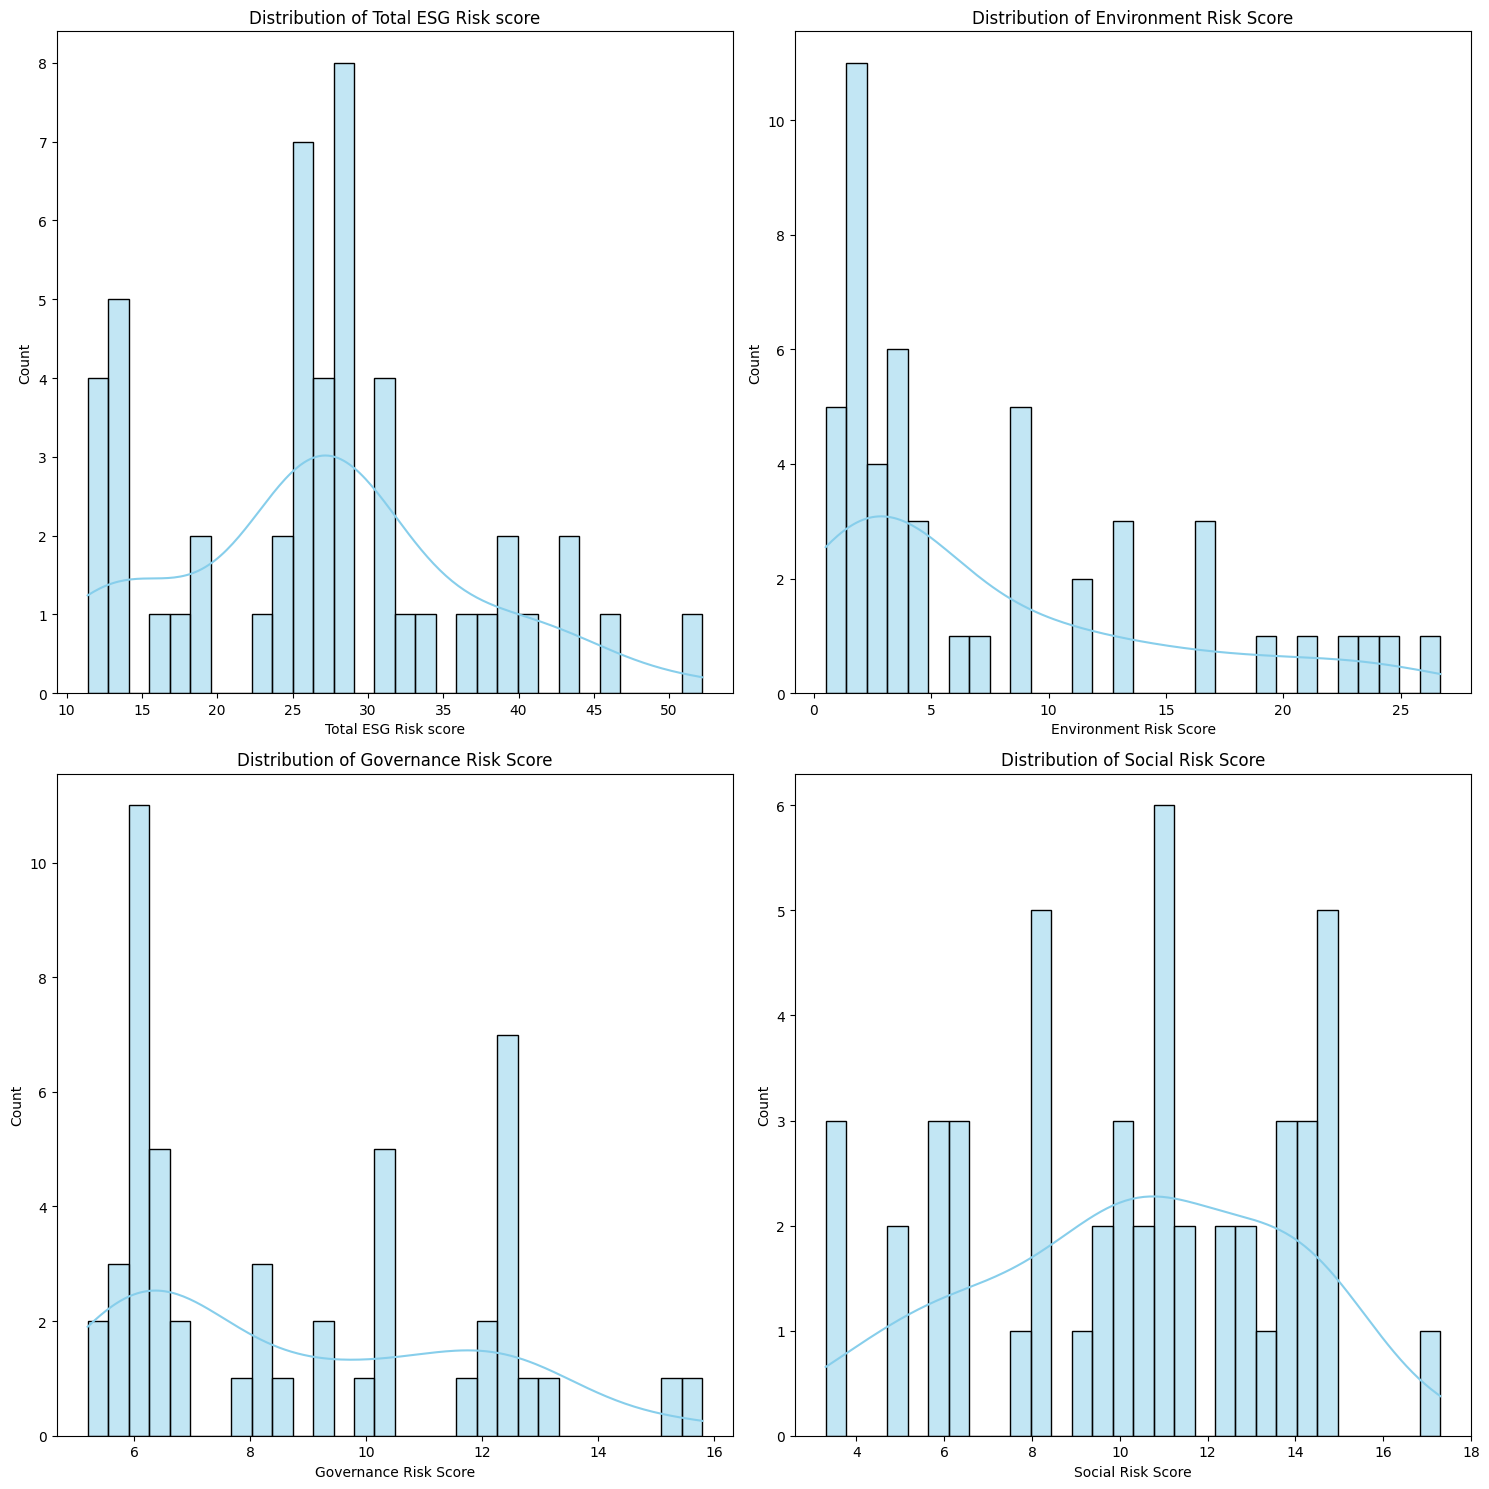

In [33]:
# Distribution of ESG Scores
score_cols = ['Total ESG Risk score','Environment Risk Score','Governance Risk Score','Social Risk Score']

plt.figure(figsize=(15,15))
for col in range(len(score_cols)):
    plt.subplot(2,2,col+1)
    sns.histplot(ESG_df[score_cols[col]],kde=True,bins=30,color='skyblue')
    plt.title(f'Distribution of {score_cols[col]}')
    plt.tight_layout()
    

- Environmental risk : most companies score very low(good sign) , but outliers exist, like some companies have larger environmental risk score
- Governance risk : Relatively Stable, clusterd mid-level.
- Social risk : more variation , some companies face high risks
- Total ESG risk: driven by variations in environment and social scores, with most on mid-risk but some high-risk firms

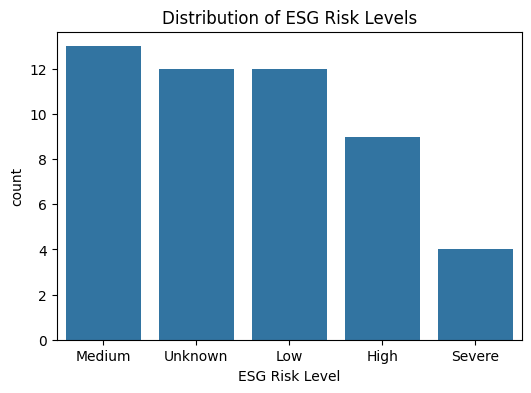

In [34]:
# Categorical Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=ESG_df, x="ESG Risk Level", order=ESG_df['ESG Risk Level'].value_counts().index)
plt.title('Distribution of ESG Risk Levels')
plt.show()

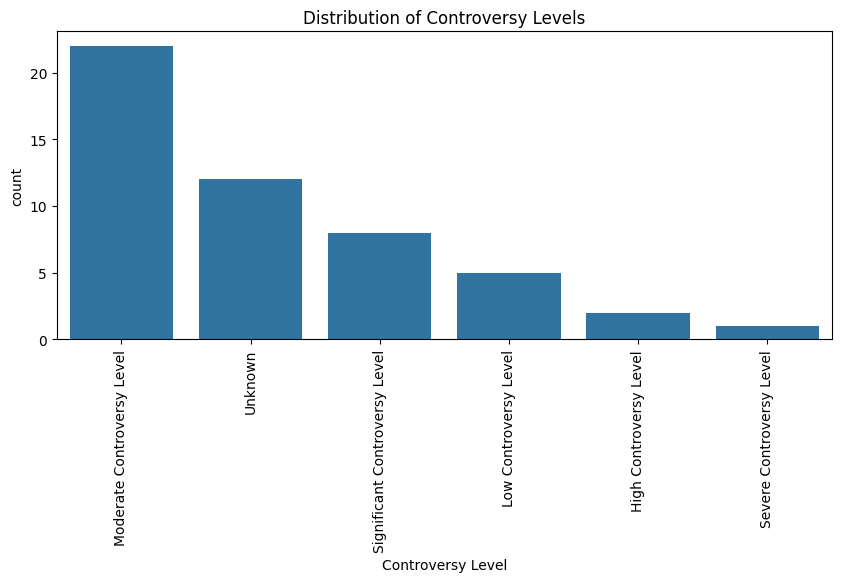

In [38]:
plt.figure(figsize=(10,4))
sns.countplot(data=ESG_df,x="Controversy Level",order=ESG_df['Controversy Level'].value_counts().index)
plt.title('Distribution of Controversy Levels')
plt.xticks(rotation = 90)
plt.show()

- Controversy Level: Most suppliers are in Moderate or Unknown. Very few are in High or Severe.
- ESG Risk Level: Balanced across Low, Medium, High, but again many Unknowns. 



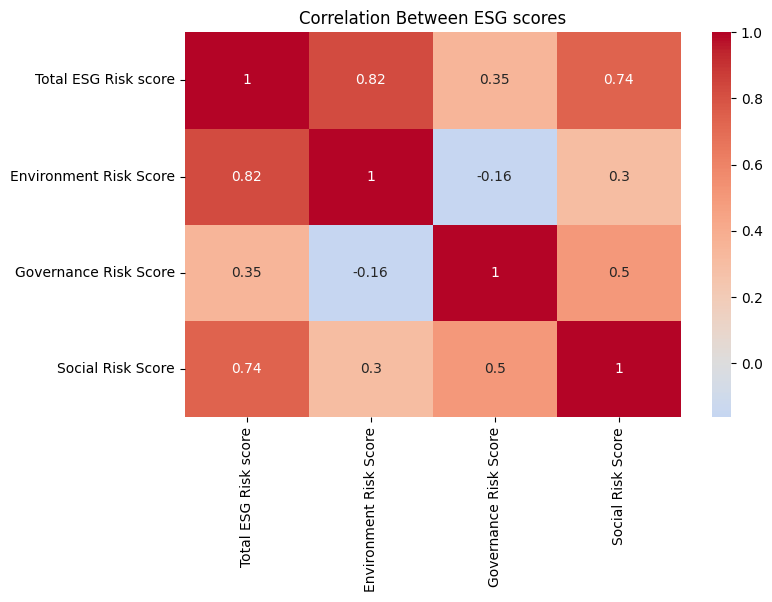

In [40]:
plt.figure(figsize=(8,5))
sns.heatmap(ESG_df[score_cols].corr(),annot=True,cmap='coolwarm',center=0)
plt.title('Correlation Between ESG scores')
plt.show()

In [41]:
ESG_df[score_cols].corr()

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score
Total ESG Risk score,1.000000,0.822571,0.346561,0.739055
Environment Risk Score,0.822571,1.000000,-0.162874,0.298386
Governance Risk Score,0.346561,-0.162874,1.000000,0.501651
Social Risk Score,0.739055,0.298386,0.501651,1.000000


- Total ESG Risk : strong correlation with Environment(0.82) and Social(0.74)
- Enviornment and Social risks contribute the most to overall ESG risk,
- Since Environment & Social scores dominate ESG Risk, suppliers with poor E/S scores will drive most risk.

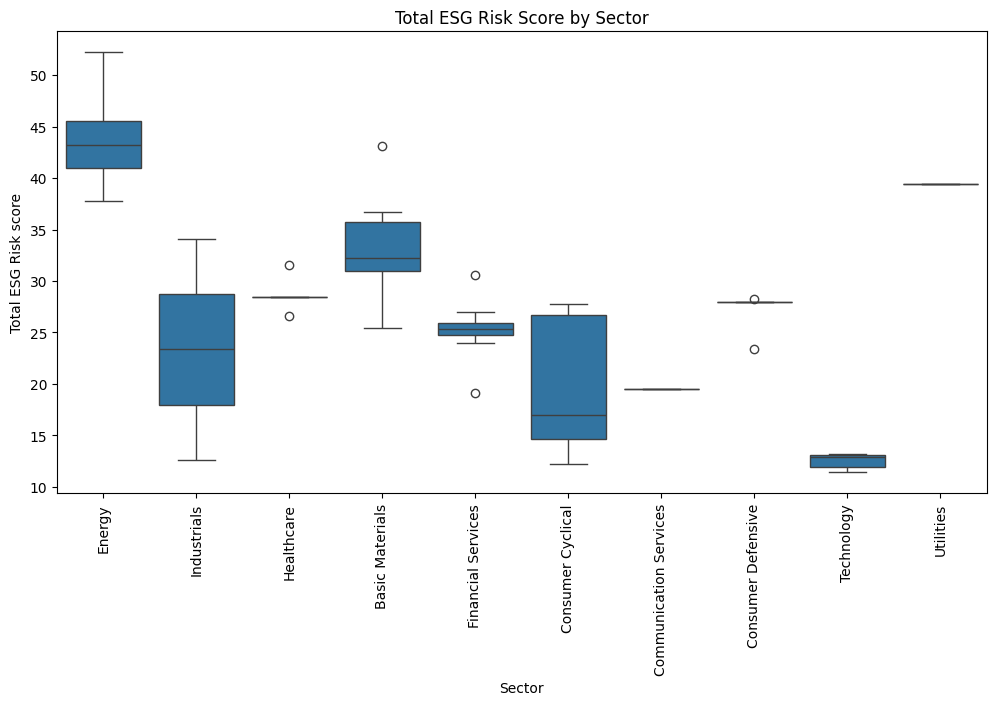

In [42]:
# ESG by Sector
plt.figure(figsize=(12,6))
sns.boxplot(data=ESG_df, x="Sector", y="Total ESG Risk score")
plt.xticks(rotation=90)
plt.title("Total ESG Risk Score by Sector")
plt.show()

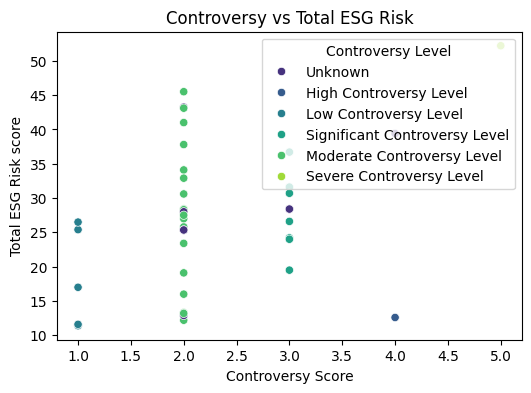

In [43]:
#  Controversy vs ESG risk
plt.figure(figsize=(6,4))
sns.scatterplot(data=ESG_df, x="Controversy Score", y="Total ESG Risk score", hue="Controversy Level", palette="viridis")
plt.title("Controversy vs Total ESG Risk")
plt.show()

In [44]:
#  Outlier detection: Top risky companies
top_risky = ESG_df[['Name','Sector','Total ESG Risk score','Controversy Score']].sort_values(by='Total ESG Risk score', ascending=False).head(10)
print("\nTop 10 Risky Companies based on ESG Risk Score:\n", top_risky)


Top 10 Risky Companies based on ESG Risk Score:
                                     Name           Sector  \
35    Oil & Natural Gas Corporation Ltd.           Energy   
12                       Coal India Ltd.           Energy   
0                 Adani Enterprises Ltd.           Energy   
16                Grasim Industries Ltd.  Basic Materials   
37              Reliance Industries Ltd.           Energy   
33                             NTPC Ltd.        Utilities   
36  Power Grid Corporation of India Ltd.        Utilities   
8      Bharat Petroleum Corporation Ltd.           Energy   
27                        JSW Steel Ltd.  Basic Materials   
30                  Larsen & Toubro Ltd.      Industrials   

    Total ESG Risk score  Controversy Score  
35                 52.20                5.0  
12                 45.50                2.0  
0                  43.25                2.0  
16                 43.10                2.0  
37                 41.00                2.0  
33

In [47]:
ESG_df.isnull().sum()

Symbol                     0
Name                       0
Sector                     0
Industry                   0
Full Time Employees       50
Total ESG Risk score       0
Environment Risk Score     0
Governance Risk Score      0
Social Risk Score          0
Controversy Level          0
Controversy Score          0
ESG Risk Percentile       12
ESG Risk Level             0
dtype: int64

In [54]:
ESG_df.head()

,Symbol,Name,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ADANIENT,Adani Enterprises Ltd.,Energy,Metals & Mining,NaN,43.25,23.35,6.5,11.5,Unknown,2.0,NaN,Unknown
1,ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,Industrials,Services,NaN,12.60,3.60,5.6,3.4,High Controversy Level,4.0,6th percentile,Low
2,APOLLOHOSP,Apollo Hospitals Enterprise Ltd.,Healthcare,Healthcare,NaN,28.40,3.30,10.3,14.7,Unknown,3.0,NaN,Unknown
3,ASIANPAINT,Asian Paints Ltd.,Basic Materials,Consumer Durables,NaN,25.40,11.30,6.2,8.0,Low Controversy Level,1.0,51st percentile,Medium
4,AXISBANK,Axis Bank Ltd.,Financial Services,Financial Services,NaN,24.20,2.30,11.6,10.3,Significant Controversy Level,3.0,45th percentile,Medium


In [55]:
ESG_df.to_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\AI powered supply chain esg and risk optimizatoin\cleaned_data\ESG_cleaned.csv")